# <u>Chapter 7: Integrals</u>

### <u>Gaussian Quadrature</u>
No longer use equally spaced $x_i$, and we ignore panels now and consider full integral from $[a,b]$ at the start. For ease we will choose $a=-1$ and $b=1$ but we can scale to any other interval via parameterization: <br><br>
$$t=\frac{b+a}{2}+\frac{b-a}{2}x$$ <br>
for $x\in[-1,1]:\to t\in[a,b]$. <br><br>
The Gauss-Legendre Quadrature takes the form:
$$\int_{-1}^1f(x)dx\approx\sum_{k=0}^{n-1}c_kf(x_k)$$ <br>
an open method approximation, so $x_k\neq-1,1$. We can integrate polynomials up to the third degree exactly with this method.
* Take $n=2$: <br><br>
$$\displaystyle{\int_{-1}^1}f(x)dx=c_0f(x_0)+c_1f(x_1)$$
where $x_0,x_1\in(a,b)$. <br><br>
There are four unknowns: $c_0,x_0,c_1,x_1$. Let $f$ be the set of monomials of equal size to the numbers of unknowns: <br><br>
    $$f(x)=\big\{x^0,x^1,x^2,x^3\big\}$$ <br>
    Our approximation is then the following system: <br><br>
    $$\begin{array}{}
    \displaystyle{\int_{-1}^1}1dx=c_0+c_1 & \displaystyle{\int_{-1}^1}xdx=c_0x_0+c_1x_1 \\
    \displaystyle{\int_{-1}^1}x^2dx=c_0x_0^2+c_1x_1^2 & \displaystyle{\int_{-1}^1}x^3dx=c_0x_0^3+c_1x_1^3
    \end{array}$$ <br>
    Assuming these integrals can be evaluated analytically to solve for our four paramaters, we now have a set of non-linear equations: <br><br>
    $$\left\{
        \begin{array}{}
            2=c_0+c_1 & (1) \\
            0=c_0x_0+c_1x_1 & (2) \\
            \dfrac{2}{3}=c_0x_0^2+c_1x_1^2 & (3) \\
            0=c_0x_0^3+c_1x_1^3 & (4)
        \end{array}
    \right.$$ <br>
    Solving this set: <br><br>
    $$\begin{array}{}
    \underline{(2):} \; c_0x_0=-c_1x_1 & \underline{(4):} \; c_0x_0^3=-c_1x_1^3 & \Longrightarrow & x_0^2=x_1^2 \\
    \; & \; & \Longrightarrow & x_0=-x_1 \\
    \underline{(2)\&(4):} \; c_0=c_1 & \underline{(1):} \; 2=c_0+c_1 \\ 
    \underline{(1)\&(2)\&(4):} \; 1=c_0=c_1 \\
    \underline{(3)\&(4):} \; x_1^2+x_1^2=\dfrac{2}{3} & \Longrightarrow \; x_0=-\dfrac{1}{\sqrt{3}} & x_1=\dfrac{1}{\sqrt{3}}
    \end{array}$$ <br>
    So our integral approximation is then <br><br>
    $$\displaystyle{\int_{-1}^1}f(x)dx\approx f\big(\tfrac{-1}{\sqrt{3}}\big)+f\big(\tfrac{1}{\sqrt{3}}\big)$$    

This may be generalized to larger $n$ but its not worth the pain (see 7.5.2 in the textbook if you prefer).

### Gauss-Legendre $n=2$ Case: exact approximation for integrating polynomials up to a third order
Use test function $f(x)=6x^3+3x^2+8.3x$, integrating from $[-3,7]$

In [6]:
import numpy as np
from sympy import *
x = symbols("x")

class func:
    def __init__(self, np, sp):
        self.np = np
        self.sp = sp
f = func(lambda x: 6*x**3+3*x**2+8.3*x, 6*x**3+3*x**2+8.3*x)

a, b = -3, 7
anal_int = integrate(f.sp, (x, a, b)) #using sympy to analytically integrate

xk = (1./np.sqrt(3))*np.array([-1,1])
ts = 0.5*(b+a) + 0.5*(b-a)*xk
gauss_leg = 0.5*(b-a)*f.np(ts).sum()

print(f"Analytical Answer: {anal_int}")
print(f"Gauss-Legendre Approximation: {gauss_leg}")

Analytical Answer: 4016.00000000000
Gauss-Legendre Approximation: 4016.000000000001


<u>References</u>:
> https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html

### <u>Monte Carlo</u>
We can do integrals by sampling random numbers.
* Computers can help us generate <i>pseudorandom</i><sup>*</sup> numbers. <br>
<sub>* : Pseudorandom because the numbers may look pretty random, but they're actually deterministic (i.e., formulaic).</sub> 

##### <u>Linear Congruential Generator:</u>
Simple approach to producing reasonably good sequences of uniformly distributed random numbers as integers from $0$ to $m-1$, where $m\in\mathbb{Z}$. <br><br>
$$\begin{array}{}
    u_i\equiv pu_{i-1}+c\;(\text{mod }m) & p,c\in\mathbb{Z}
\end{array}$$ <br>
with $u_0$ as any integer; call it the <i>seed</i>. <br><br>
$\underline{\mathcal{Ex:}}$ Let $u_0=5$; let $p=4$, $c=1$, $m=15$
>$$\begin{align}{}
    u_1 &= 4\cdot 5+1\;(\text{mod }15) &u_2 &= 4\cdot 6+1\;(\text{mod }15) &u_3 &= 4\cdot 10+1\;(\text{mod }15)\\
    &= 6 &\; &= 10 &\; &= 11\\
    \\
    u_4 &=4\cdot 11+1\;(\text{mod }15) & u_5 &= 4\cdot 0+1\;(\text{mod }15) &u_6 &= 4\cdot 1+1\;(\text{mod }15)\\
    &= 0 &\; &=1 &\; &= 5
\end{align}$$
>
and so the set of numbers for the given paramaters is $\{6,10,11,0,1,5\}$ for $i\in(1,6)$; the set repeats itself because the last random integer is the same as the seed $u_0$. The distinct numbers are those from $u_0$ to $u_5$, so we say we have a <i>period</i> of 6.
* A linear congruential generator sequence cannot have a period that is larger than $m$. <br><br>
* The numbers produced are from $0$ to $m-1$ since we're taking $\text{mod }m$. <br><br>
* There can only exist $m$ distinct numbers. <br><br>
* $m$ is typically chosen to be large with the usual choice being 2 raised to a large power. Likewise, $p$ should be chosen to be large as well.

To get floats, let $r_i=\frac{u_i}{m}$. So $[0,\;m-1]\subset\mathbb{Z}\Longrightarrow[0,\;1)\subset\mathbb{R}$ $\big($e.g., $\{6, 10, 11, 0, 1, 5\}\Longrightarrow\{0.\bar{3}, 0.4, 0.\bar{6}, 0.7\bar{3}, 0.0, 0.0\bar{6}, 0.\bar{3}\}\big)$. <br><br>
If we want random floats not in $[0,1)$ but in $[a,b)$, let $x_i=a+(b-a)r_i$. So $r_i\in[0,1)\Longrightarrow x_i\in[a,b)$.

### Test of statistical quality for random numbers (i.e., test for correlation) by plotting pairs $(x_i,y_i)=(r_{i-1},r_i)$, where $r_i=\frac{u_i}{m}$ for the cases of a "bad", "good", and NumPy random number generators.

Text(0.5, 1.0, 'NumPy Random Numbers')

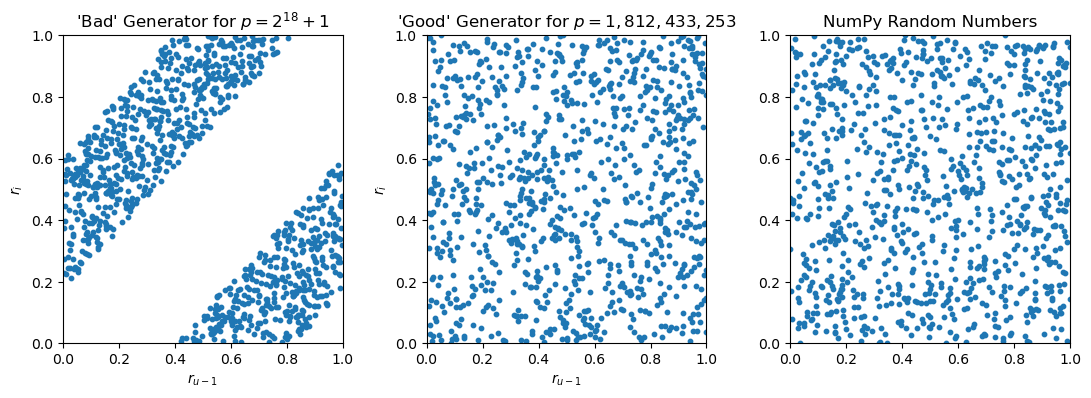

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13,4))
ax1, ax2, ax3 = fig.add_subplot(131), fig.add_subplot(132), fig.add_subplot(133)
plt.subplots_adjust(wspace=0.3)

def LCG(p, c, m, seed, n): #LCG for linear congruential generator
    A = []
    u = lambda p, c, m, ui: (p*ui+c) % m #the formula
    u0 = seed
    u1 = u(p, c, m, u0)
    A.append(u1)
    for i in range(n):
        us = u(p, c, m, A[i])
        A.append(us)
    return np.array(A)

seed = 314159
n = 1000 #lowercase n for sample size
m = 2**32

def ax_scatter(ax, X): #saved a few lines
    xs, ys = (X/m)[0:n-1], (X/m)[1:n]
    ax.scatter(xs, ys, s=10)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_xlabel("$r_{u-1}$")
    ax.set_ylabel("$r_i$")
    
X1 = LCG(2**18+1, 7, m, seed, n) #"bad" p: p = 2**18+1 or exactly 262,145
ax_scatter(ax1, X1)
ax1.set_title("'Bad' Generator for $p=2^{18}+1$")

X2 = LCG(1812433253, 7, m, seed, n) #"good" p: p = 1,812,433,253
ax_scatter(ax2, X2)
ax2.set_title("'Good' Generator for $p=1,812,433,253$")

np.random.seed(seed)
X3 = np.random.uniform(0,1,n) #uppercase X for random variable
xs3, ys3 = X3[0:n-1], X3[1:n]
ax3.scatter(xs3, ys3, s=10)
ax3.set_xlim(0,1)
ax3.set_ylim(0,1)
ax3.set_title("NumPy Random Numbers")

##### <u>Population Mean and Population Variance:</u>
The expectation value $E$ of a function of a continuous random variable $X$ is given as <br><br>
$$E\big(f(X)\big)=\int_{-\infty}^{\infty}P(x)f(x)dx$$ <br>
where $P(x)$ is the probability density function uniform from $a$ to $b$ s.t. $P(x)\equiv\frac{1}{b-a}$.
* Let $\mu_f$ the <i>population mean</i> be $\mu_f\equiv E\big(f(X)\big)$. From our definitions above, $E\big(f(X)\big)=\displaystyle{\frac{1}{b-a}\int_a^b}f(x)dx$. <br><br>
* Let $\sigma^2$ the <i>population variance</i> be $\sigma_f^2\equiv E\big(\big[f(X)-E\big(f(X)\big)\big]^2\big)\equiv V\big(f(X)\big)$: <br><br>
$$\begin{align}
\sigma_f^2 &= E\big(\big[f(X)\big]^2-2f(X)E\big(f(X)\big)+\big[E\big(f(X)\big)\big]^2\big) \\
&= E\big(f^2(X)\big)-E^2\big(f(X)\big) \\
\\
\sigma_f^2 &= \displaystyle{\frac{1}{b-a}\int_a^b}f^2(x)dx-\left(\displaystyle{\frac{1}{b-a}\int_a^b}f(x)dx\right)^2
\end{align}$$ <br>
and the square root of $\sigma_f^2$ is the <i>population standard deviation</i> $\sigma_f$.

$\mu_f$ and $\sigma_f$ are unknown paramaters, but we may estimate them by Monte Carlo integration.

##### <u>Sample Mean:</u>
We will take $n$ samples of the random variables $X_0, X_1, \ldots, X_{n-1}$ from $P(x)$, which is uniform. <br><br>
$\underline{\mathcal{Ex:}}$ Roll a 6-sided die $n$ times
> Each $X_i$ can take the values $1,2,\ldots,6$ with a probability of $\frac{1}{6}$ each.
>
Then we evaluate a function value at each sample point, i.e., $f(X_0), f(X_1),\ldots, f(X_{n-1})$. We define the <i>sample mean</i> $\overline{f}$ as <br><br>
$$\overline{f}\equiv\frac{1}{n}\sum_{i=0}^{n-1}f(X_i)$$ <br>
Note that $\overline{f}$ is not equivalent to $\mu_f$ because we took $n$ samples; they are only equivalent for $\displaystyle{\lim_{n\to\infty}\overline{f}}=\mu_f$. <br><br>
We estimate $\mu_f$ as <br><br>
$$\begin{align}
    E\left(\overline{f}\right) = E\left(\frac{1}{n}\sum_{i=0}^{n-1}f(X_i)\right) &= \frac{1}{n}\sum_{i=0}^{n-1}E\left(\overline{f}(X_i)\right) \\
    &= E\big(f(X)\big) \\
    &\approx \mu_f
\end{align}$$ <br>
So the expectation value of the sample mean is the population mean. Therefore, $\overline{f}$ is an unbiased estimator of $\mu_f$.

##### <u>Sample Variance:</u>
To measure how fast the sample mean approaches the population mean, let the variance of the sample mean be $\sigma_{\overline{f}}^2$. The sample mean variance is defined as <br><br>
$$\begin{align}
    \sigma_\overline{f}^2=V\big(\overline{f}\big) &= V\left(\frac{1}{n}\sum_{i=0}^{n-1}f(X_i)\right) \\
    &= \frac{1}{n^2}\sum_{i=0}^{n-1}V\big(f(X_i)\big)^* \\
    &= \frac{1}{n^2}\big(n\sigma_f^2\big) \\
    &= \frac{1}{n}\sigma_f^2
\end{align}$$ <br>
<sup>* For independent (uncorrelated) random variables $X_1$ and $X_2$, $V(aX_1+bX_2)=a^2V(X_1)+b^2(X_2)$</sup> <br>
So our uncertainty in our sample mean is the square root of the sample mean variance, i.e., the sample mean standard deviation $\displaystyle{\frac{\sigma_f}{\sqrt{n}}}$. But we still don't know $\sigma_f^2$ (i.e., the population variance). <br><br>
Let $\eta\equiv\overline{f^2}-\big(\overline{f}\big)^2$. The expectation value of $\eta$ is <br><br>
$$E(\eta)=E\big(\overline{f^2}\big)-E\big(\overline{f}^{\;2}\big)$$ <br>
$$\begin{align}
    E\big(\overline{f^2}\big) &= E\left(\frac{1}{n}\sum_{i=0}^{n-1}f^2(X_i)\right) &\; 
    \underline{\text{Recall:}}\;V\big(f(X)\big) &= E\big(f^2(X)\big)-\big(E\big(f(X)\big)\big)^2 &\;
    \underline{\underline{\text{Also:}}}\; V\big(\overline{f}\big) &= E\big(\overline{f}^{\;2}\big)-
    \big(E\big(\overline{f}\big)\big)^2\\
    &= \frac{1}{n}\sum_{i=0}^{n-1}\underline{E\big(f^2(X_i)\big)} &E\big(f^2(X)\big) &= 
    V\big(f(X)\big)+\big(E\big(f(X)\big)\big)^2 &E\big(\overline{f}^{\;2}\big) &= 
    V\big(\overline{f}\big)+\big(E\big(\overline{f}\big)\big)^2\\
    &= \frac{1}{n}n\big(\sigma_f^2+\mu_f^2\big) &\; &= \sigma_f^2+\mu_f^2 &\; &= \sigma_\overline{f}^2+\mu_f^2\\
    &= \sigma_f^2+\mu_f^2 &\; &\; &\; &= \frac{\sigma_f^2}{n}+\mu_f^2
\end{align}$$ <br>
And so,
$$\begin{align}
    E(\eta) &= \sigma_f^2+\mu_f^2-\frac{\sigma_f^2}{n}-\mu_f^2 \\
    &= \sigma_f^2-\frac{\sigma_f^2}{n} \\
    &= \sigma_f^2\left(1-\frac{1}{n}\right) \\
    &= \sigma_f^2 \; \frac{n-1}{n}
\end{align}$$ <br>
As it can be seen, $E(\eta)$ is a biased estimator of $\sigma_f^2$. Bessel's correction (i.e., multiplying by the reciprocal of the biased factor) may be used to return the unbiased estimator, known as <i>sample variance</i>, but instead one may observe for large enough $n$, $\displaystyle{\frac{n-1}{n}}\approx1$. <br><br>
We estimate population variance with sample variance by <br><br>
$$\begin{align}
    \sigma_\overline{f}^2 &= \frac{\sigma_f^2}{n} \\
    &\approx \frac{1}{n}\left(\frac{n}{n-1}\eta\right) = \frac{1}{n-1}\Big(\underbrace{\overline{f^2}-\
    \overline{f}^2}_{\text{calculable}}\Big)
\end{align}$$

##### <u>Monte Carlo Integration:</u>
Recall that our goal has been to approximate an integral: <br><br>
$$\begin{align}
    \displaystyle{\int_a^b}f(x)dx &= (b-a)\mu_f \\
    &\approx (b-a)\overline{f}\pm(b-a)\sigma_\overline{f} \\
    &\approx (b-a)\overline{f}\pm(b-a)\sqrt{\frac{\overline{f^2}-\overline{f}^2}{n-1}} \\
    &\approx \frac{b-a}{n}\sum_{i=0}^{n-1}f(X_i)\pm\frac{b-a}{\sqrt{n-1}}\sqrt{\frac{1}{n}\sum_{i=0}^{n-1}f^2(X_i)-\left(
    \frac{1}{n}\sum_{i=0}^{n-1}f(X_i)\right)^2}
\end{align}$$ <br>
where the $X_i$'s are chosen uniformly from $a$ to $b$. Notice how the coefficient of the first term at the right-hand side, $\displaystyle{\frac{b-a}{n}}$, looks similar to the height given for rectangle and midpoint approximation rule $h=\displaystyle{\frac{b-a}{n-1}}$. The difference, however, is that the height in Monte Carlo integration is determined by the value of the function at uniformly distributed $X_i$'s.

### Monte Carlo integration for the function $f(x)=\frac{1}{\sqrt{x^2+1}}$.

In [10]:
import numpy as np
from IPython.display import display, Latex
from sympy import *
x = symbols("x")

class func:
    def __init__(self, np, sp):
        self.np = np
        self.sp = sp
f = func(lambda x: 1./np.sqrt(x**2+1), 1/sqrt(x**2+1))

def LCG(p, c, m, seed, n): #same function from random sampling notes
    A = []
    u = lambda p, c, m, ui: (p*ui+c) % m #the formula
    u0 = seed
    u1 = u(p, c, m, u0)
    A.append(u1)
    for i in range(n):
        us = u(p, c, m, A[i])
        A.append(us)
    return np.array(A)

def montecarlo(f, a, b, n, rng="LCG"):
    if rng == "LCG":
        seed = 314159
        m = 2**32
        ui = LCG(1812433253, 7, m, seed, n)
        ri = ui/m
        Xs = a+(b-a)*ri #all from the random sampling notes
    elif rng == "Numpy":
        np.random.seed(1)
        Xs = np.random.uniform(a,b,n) #can use numpy rng instead
    else:
        raise ValueError("Please choose either 'LCG' or 'Numpy' as the RNG")
    fs = f(Xs)
    
    n_tilde = fs.size
    fbar = np.sum(fs)/n_tilde
    fsq = np.sum(fs**2)/n_tilde
    varfbar = (fsq-fbar**2)/(n_tilde-1)
    dfbar = np.sqrt(varfbar) #all from the sample mean and sample variance notes
    return (b-a)*fbar, (b-a)*dfbar

anal_int = integrate(f.sp, (x, 0, 1)).evalf()
print(f"Analytical Integral Answer: {anal_int}")

for n in 10**np.arange(2,7):
    n_string = str(n)
    for s in range(0, (7+1)-len(n_string)):
        n_string = n_string+"\;\;" #little complicated loop to make formatting look a little nicer
    MC_int, err = montecarlo(f.np, 0., 1., n) #pass the optional parameter 'Numpy' to use np RNG
    delta = abs(MC_int-anal_int)
    display(Latex(f"$n={n_string}$ Monte Carlo Integral Answer: ${MC_int:1.9f}\pm{err:1.9f}$, $\delta_{{F-\widetilde{{f}}}}={delta:1.9f}$"))

Analytical Integral Answer: 0.881373587019543


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>